In [149]:
import root_finder as rf
from AD import DiffObj, Variable, VectorFunction
from AD import MathOps as mo
import random
from scipy.interpolate import interp1d
random.seed(13)

import numpy as np
import matplotlib.pyplot as plt
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
def pretty_print_results(results_list):
    print("RootFinder found a total of {} roots for the function".format(len(results_list))) 
    for root in results_list:   
        print("Found root: {}".format(root[0]))
        print("Function value at root: {}".format(root[1]))
        print("Number of iterations needed to find the root: {}".format(root[2]))
        print("List of error values:{}".format(root[3]))
        
        plt.title("Error values vs. iteratation number")
        plt.xlabel("Iteration Number")
        plt.ylabel("Error Value")
        
        # add smooth line
        x = list(range(len(root[3])))
        y = root[3]
        if(len(x)>2):
            x_new = np.linspace(min(x), max(x),500)
            f = interp1d(x, y, kind='quadratic')
            y_smooth=f(x_new)
            plt.plot (x_new,y_smooth)      
        plt.scatter(x,y);
    
    labels = ["Error for root {}".format(i+1) for i in range(len(results_list))]
    plt.legend(labels)

RootFinder found a total of 1 roots for the function
Found root: {'x': -1.0}
Function value at root: [0.0]
Number of iterations needed to find the root: 2
List of error values:[527, 0.0]


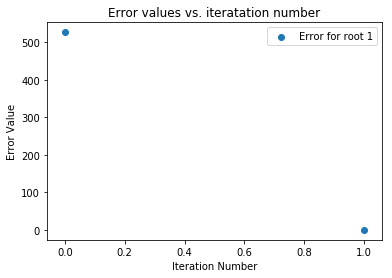

In [152]:
x = Variable('x')
y = Variable('y')

test_f_0 =  x+1

results_t0= rf.vectorNewton(test_f_0, num_starting_vals=10, verbose=True)
results_t0
pretty_print_results(results_t0)

RootFinder found a total of 1 roots for the function
Found root: {'x': -1.0000000000003548}
Function value at root: [-1.0644818360106e-12]
Number of iterations needed to find the root: 20
List of error values:[278445076, 82502244.48148149, 24445109.216735266, 7242995.064217865, 2146072.3523608795, 635873.0303292528, 188406.56454235033, 55823.90801372772, 16540.157933974107, 4900.528290167706, 1451.7491683515284, 429.8887954587596, 127.1157145837997, 37.406392972506566, 10.829927619035626, 2.968657582619413, 0.6786888138414175, 0.0873552124336705, 0.002318413376432016, 1.7870765407490552e-06]


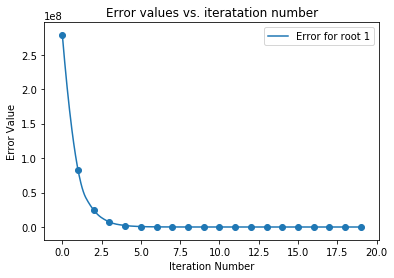

In [155]:
test_f_1 = x**3+1
results_t1= rf.vectorNewton(test_f_1, num_starting_vals=1000, verbose=True)
pretty_print_results(results_t1)
#plt.scatter(list(range(len(results_t1[0][3]))),results_t1[0][3]);

RootFinder found a total of 2 roots for the function
Found root: {'y': -1.0, 'x': 1.0}
Function value at root: [0.0, 0.0]
Number of iterations needed to find the root: 15
List of error values:[612498, 152685.43750002567, 38171.29687510875, 9542.761719186525, 2385.627931433956, 596.3444894074408, 149.02364854217927, 37.19351680907663, 9.23629649747354, 2.248221237127739, 0.5058097593553652, 0.08462563148077873, 0.0053503802681145185, 2.802675385016329e-05, 7.854110695149075e-10]
Found root: {'y': 3.33625196925126e-12, 'x': -3.336251969463018e-12}
Function value at root: [3.3362519692623905e-12, -2.117582368135751e-22]
Number of iterations needed to find the root: 11
List of error values:[6006, 1501.4375026014573, 375.29688605532533, 93.76176311982134, 23.378106982561086, 5.782688034333921, 1.3857620646100932, 0.29349263888360316, 0.03962239914407968, 0.001355156333360594, 1.8265476573431633e-06]


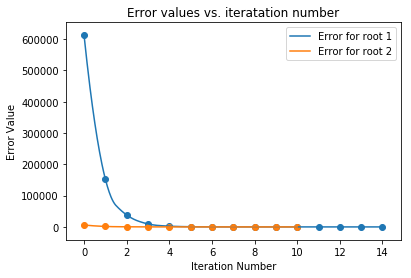

In [158]:
# test 2
x = Variable('x')
y = Variable('y')

test_f2 = VectorFunction([x**2+y, y+x])
results_t2= rf.vectorNewton(test_f2, num_starting_vals=10, verbose=True)
pretty_print_results(results_t2)